In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "../datasets/glass.csv"
df = pd.read_csv(url)

# Handle missing values
if df.isnull().sum().any():
    df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.iloc[:, :-1].values  # All columns except 'Type'
y = df.iloc[:, -1].values   # 'Type' column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes = GaussianNB()

# Train classifiers
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate performance
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))


K-Nearest Neighbors:
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        43
   macro avg       0.62      0.59      0.59        43
weighted avg       0.66      0.70      0.67        43

Logistic Regression:
               precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                     

D:\Softwarestuff\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwarestuff\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwarestuff\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for KNN
Accuracy: 0.70
Precision: 0.66
Recall (Sensitivity): 0.70
F1-Score: 0.67



D:\Softwarestuff\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for Logistic Regression
Accuracy: 0.74
Precision: 0.71
Recall (Sensitivity): 0.74
F1-Score: 0.73

Performance Metrics for Naive Bayes
Accuracy: 0.51
Precision: 0.48
Recall (Sensitivity): 0.51
F1-Score: 0.45



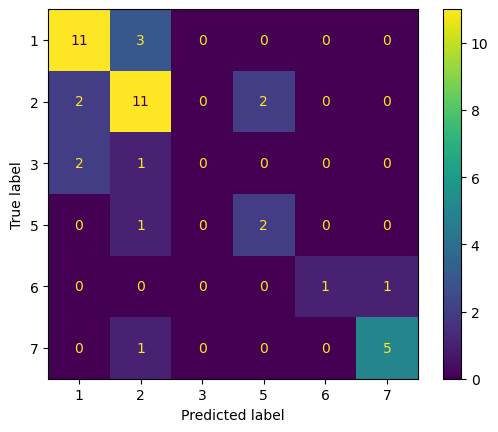

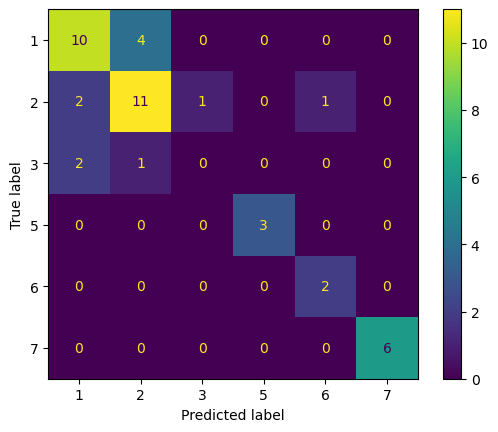

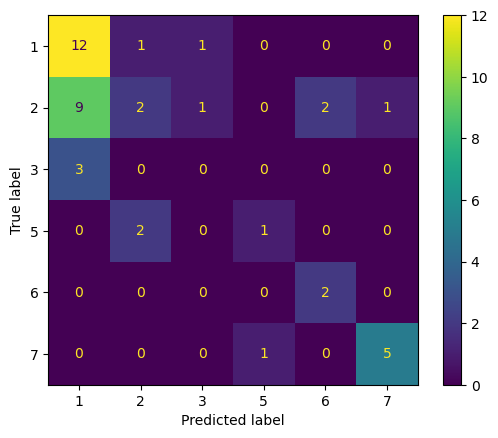

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Define a function for evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    return accuracy, precision, recall, f1

# Evaluate each classifier
metrics_knn = evaluate_model(y_test, y_pred_knn, "KNN")
metrics_log_reg = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
metrics_nb = evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Performance Metrics for Stacking Ensemble
Accuracy: 0.74
Precision: 0.71
Recall (Sensitivity): 0.74
F1-Score: 0.72



D:\Softwarestuff\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


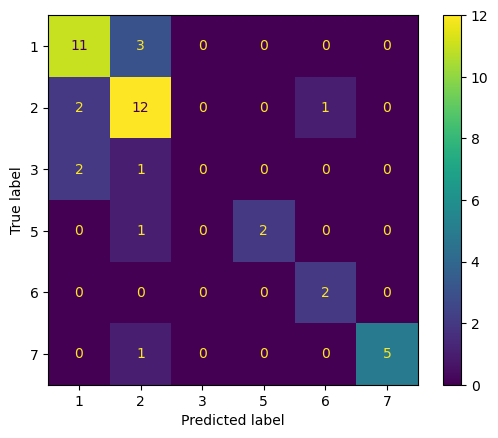

In [7]:
from sklearn.ensemble import StackingClassifier

# Create a stacking ensemble
base_classifiers = [
    ('knn', knn),
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes)
]
stacking_ensemble = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)

# Train the stacking ensemble
stacking_ensemble.fit(X_train, y_train)

# Predictions
y_pred_stack = stacking_ensemble.predict(X_test)

# Evaluate stacking model
metrics_stack = evaluate_model(y_test, y_pred_stack, "Stacking Ensemble")

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameters for tuning (example for KNN)
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'final_estimator__C': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'final_estimator__C': 1, 'knn__n_neighbors': 3}


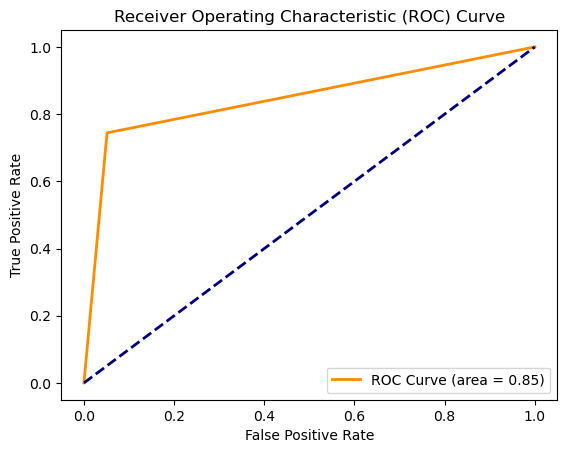

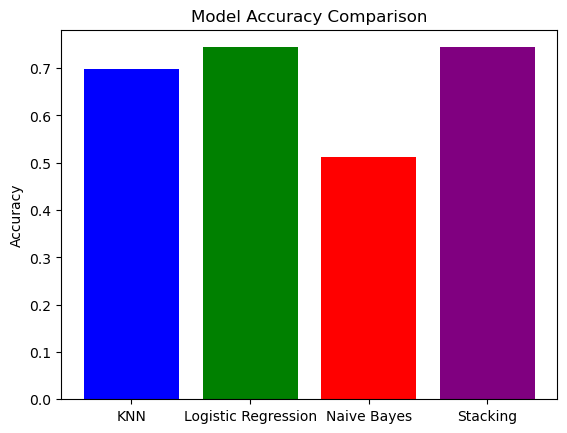

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_stack_bin = label_binarize(y_pred_stack, classes=np.unique(y))

# ROC Curve for stacking ensemble
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_stack_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Bar chart for performance comparison
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking']
accuracies = [metrics_knn[0], metrics_log_reg[0], metrics_nb[0], metrics_stack[0]]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
